<a href="https://colab.research.google.com/github/MrXisOnline/Models-with-ML-DL/blob/master/Foundational_Things.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Functions

In [1]:
import numpy as np

In [3]:
a = np.array([5, 3, 8])
b = np.array([4, 2, 7])
print("a + b -> {}".format(a+b))
print("a * b -> {}".format(a*b))

a + b -> [ 9  5 15]
a * b -> [20  6 56]


In [5]:
a = np.array([[1, 2], [3, 4]])
print(a)
print("sum of a about row, {}".format(a.sum(axis=0)))
print("sum of a about column, {}".format(a.sum(axis=1)))

[[1 2]
 [3 4]]
sum of a about row, [4 6]
sum of a about column, [3 7]


In [9]:
def square(x: np.ndarray) -> np.ndarray:
    return np.power(x, 2)

def LeakyReLU(x: np.ndarray) -> np.ndarray:
    return np.maximum(0.2 * x, x)

In [11]:
square(np.array([3, 2])), LeakyReLU(np.array([3, 2]))

(array([9, 4]), array([3., 2.]))

### Derivatives

In [37]:
from typing import Callable

def deriv(func: Callable[[np.ndarray], np.ndarray], 
          input_: np.ndarray, 
          delta: float = 1e-6):
    return (func(input_+ delta) - func(input_ - delta))/(2*delta)

In [38]:
deriv(square, np.array([2, 5]))

array([ 4., 10.])

### Nested Functions

In [39]:
from typing import List
Array_Function = Callable[[np.ndarray], np.ndarray]
Chain = List[Array_Function]

def chain_length_2(chain: Chain, 
                   input_: np.ndarray) -> np.ndarray:
    func0 = chain[0]
    func1 = chain[1]
    return func1(func0(input_))

### Chain Rule

In [40]:
from numpy import ndarray

In [41]:
def sigmoid(x: ndarray):
    return 1 / 1 + np.exp(-x)

In [50]:
def chain_deriv_2(chain: Chain, 
                  input_: ndarray):
    f1 = chain[0]
    f2 = chain[1]
    f1_of_x = f1(input_)
    df1dx = deriv(f1, input_)
    df2dx = deriv(f2, f1_of_x)
    return df2dx * df1dx

In [83]:
import matplotlib.pyplot as plt

def plot_chain(chain: Chain, input_range):
    previous = chain[0](input_range)
    for i in range(1, len(chain)):
        previous = chain[i](previous)
    plt.plot(previous)

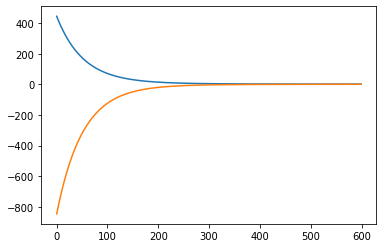

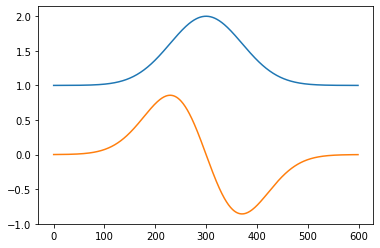

In [85]:
input_range = np.arange(-3, 3, 0.01)
chain1 = [sigmoid, square]
chain2 = [square, sigmoid]
plot_chain(chain1, input_range)
plt.plot(chain_deriv_2(chain1, input_range))
plt.show()
plot_chain(chain2, input_range)
plt.plot(chain_deriv_2(chain2, input_range))

### Generalized Chain Rule

In [77]:
def chain_rule(chain: Chain, input_range: ndarray) -> ndarray:
    assert len(chain) > 1, "Chain needs to have atleast 2 functions"
    previous_result = deriv(chain[0], input_range)
    previous_chain = chain[0](input_range)
    for i in range(1, len(chain)):
        previous_result = deriv(chain[i], previous_chain) * previous_result
        previous_chain = chain[i](previous_chain)
    return previous_result

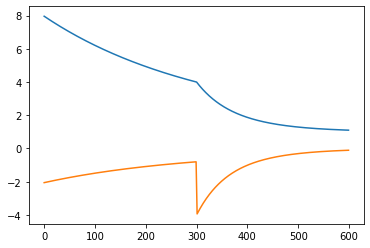

In [86]:
plot_chain([LeakyReLU, sigmoid, square], input_range)
plt.plot(chain_rule([LeakyReLU, sigmoid, square], input_range))
# plt.plot(chain_rule(chain2, input_range))

### Function with multiple inputs